In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

def limpiar(string):
    r = ""
    for i in string:
        i = i.lower()
        if i == "á":
            r += "a"
        elif i== "é":
            r += "e"
        elif i== "í":
            r += "i"
        elif i== "ó":
            r += "o"
        elif i== "ú":
            r += "u"
        else:
            r+=i
    return r


# Texto introducción

In [40]:
df_rendimiento = pd.read_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv')
df_psu = pd.read_csv("Dataframes/promedio_puntajes_pdt.csv")

gdf_comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)[["geometry", "COMUNA", "REGION"]]
gdf_comunas = gdf_comunas[gdf_comunas["REGION"] == "Metropolitana de Santiago"]
gdf_comunas.COMUNA = gdf_comunas.COMUNA.map(lambda x:limpiar(x).upper())

df_rendimiento.drop(columns=["COD_COM_RBD", "COD_DEPE2"], inplace=True)
df_rendimiento.rename(columns={"NOM_COM_RBD": "COMUNA"}, inplace=True)
df_rendimiento.COMUNA = df_rendimiento.COMUNA.map(lambda x:limpiar(x).upper())
df_rendimiento.head()

,PROM_GRAL,ASISTENCIA,COMUNA
0,5.484932,81.178082,ALHUE
1,5.182028,76.610599,BUIN
2,5.629167,83.392361,CALERA DE TANGO
3,4.841667,85.937500,CERRILLOS
4,3.677381,57.619048,CERRO NAVIA


In [24]:
df_psu.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,ALHUE,5.768235,633.235294,398.82224,438.52274,414.59260,419.57693
1,BUIN,5.834584,596.377888,478.75198,489.61330,481.09490,478.68400
2,CALERA DE TANGO,6.062633,657.846975,520.87805,533.76110,523.26117,537.23224
3,CERRILLOS,5.695290,571.275214,488.19420,486.79790,479.68362,483.45578
4,CERRO NAVIA,5.707121,580.460606,434.11290,462.51868,446.87740,422.11346


<AxesSubplot:>

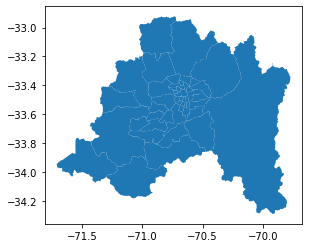

In [33]:
gdf_comunas.plot()

In [44]:
gdf_todo = df_rendimiento.merge(df_psu, on="COMUNA")
gdf_todo = gdf_todo[["COMUNA", "PROM_GRAL", "ASISTENCIA", "NEM", "RANKING", "LENGUAJE", "MATEMATICAS", "HISTORIA", "CIENCIAS"]]
gdf_todo.head()

,COMUNA,PROM_GRAL,ASISTENCIA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,ALHUE,5.484932,81.178082,5.768235,633.235294,398.82224,438.52274,414.59260,419.57693
1,BUIN,5.182028,76.610599,5.834584,596.377888,478.75198,489.61330,481.09490,478.68400
2,CALERA DE TANGO,5.629167,83.392361,6.062633,657.846975,520.87805,533.76110,523.26117,537.23224
3,CERRILLOS,4.841667,85.937500,5.695290,571.275214,488.19420,486.79790,479.68362,483.45578
4,CERRO NAVIA,3.677381,57.619048,5.707121,580.460606,434.11290,462.51868,446.87740,422.11346


# Desarrollo

In [ ]:
#Algo de machine learning?

In [ ]:
#Testear el machine learning